In [71]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import classical_part, utilities
import random
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
x_train, xq_train, y_train, x_val, xq_val, y_val, x_test, xq_test, y_test = classical_part.load_fashion_mnist(10, 3, 3)

4431872/4422102 [==============================] - 1s 0us/step


In [73]:
 
    
cmodel = classical_part.classical_model()
cmodel.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
H1 = cmodel.fit(x_train, y_train, validation_data=(x_val, y_val),
        batch_size=1, epochs=30, verbose=0)

hmodel = classical_part.hybrid_model()
hmodel.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
H2 = hmodel.fit(xq_train, y_train, validation_data=(xq_val, y_val),
        batch_size=1, epochs=30, verbose=0)

hmodel1 = classical_part.hybrid_model()
hmodel1.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
H3 = hmodel1.fit(x_train, y_train, validation_data=(x_val, y_val),
        batch_size=1, epochs=30, verbose=0)

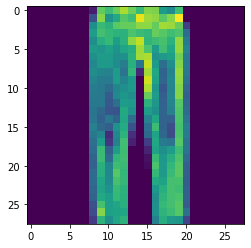

In [77]:
plt.imshow(x_train[0])